## Reinforcement learning - Theses implementation

In [ ]:
!pip install stable-baselines3 gymnasium arch mplfinance

import typing as tt
import gymnasium as gym
from arch import arch_model
from gymnasium import spaces
from gymnasium.envs.registration import EnvSpec
import enum
import numpy as np
from stable_baselines3 import PPO
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('googl.us.txt')
# data = pd.read_csv('ibm.us.txt')
data.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2004-08-19,50.000,52.03,47.980,50.170,44703800,0
1,2004-08-20,50.505,54.54,50.250,54.155,22857200,0
2,2004-08-23,55.375,56.74,54.525,54.700,18274400,0
3,2004-08-24,55.620,55.80,51.785,52.435,15262600,0
4,2004-08-25,52.480,54.00,51.940,53.000,9197800,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     3333 non-null   object 
 1   Open     3333 non-null   float64
 2   High     3333 non-null   float64
 3   Low      3333 non-null   float64
 4   Close    3333 non-null   float64
 5   Volume   3333 non-null   int64  
 6   OpenInt  3333 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 182.4+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
data = data.drop(columns=['OpenInt'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3333 entries, 2004-08-19 to 2017-11-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3333 non-null   float64
 1   High    3333 non-null   float64
 2   Low     3333 non-null   float64
 3   Close   3333 non-null   float64
 4   Volume  3333 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 156.2 KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Open,High,Low,Close,Volume
count,3333.000000,3333.000000,3333.000000,3333.000000,3.333000e+03
mean,389.993375,393.377354,386.213266,389.855821,7.951734e+06
std,235.104757,236.348229,233.616339,235.102374,8.327410e+06
min,49.595000,50.870000,47.980000,50.005000,0.000000e+00
25%,228.730000,230.930000,226.170000,228.510000,2.535424e+06
50%,295.980000,298.190000,293.350000,295.610000,5.201600e+06
75%,550.370000,554.780000,545.500000,549.490000,1.047400e+07
max,1050.050000,1063.620000,1047.050000,1058.290000,8.223340e+07


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


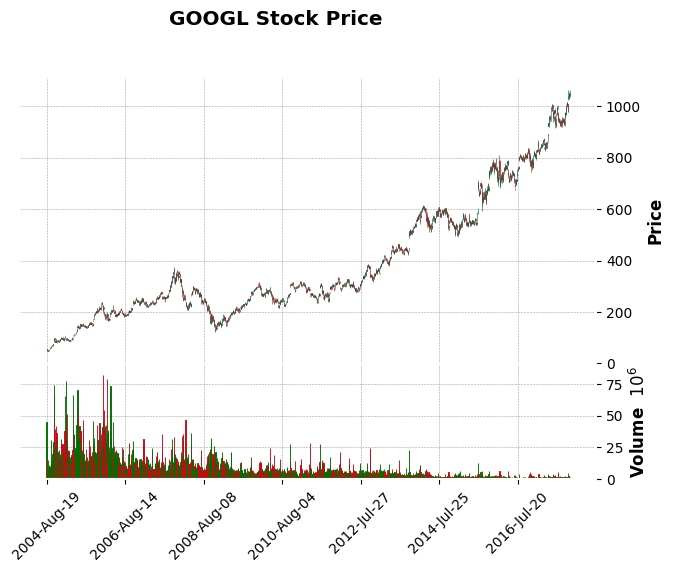

In [ ]:
import mplfinance as mpf
mpf.plot(data, type='candle', style='charles', volume=True, title='GOOGL Stock Price', ylabel='Price')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


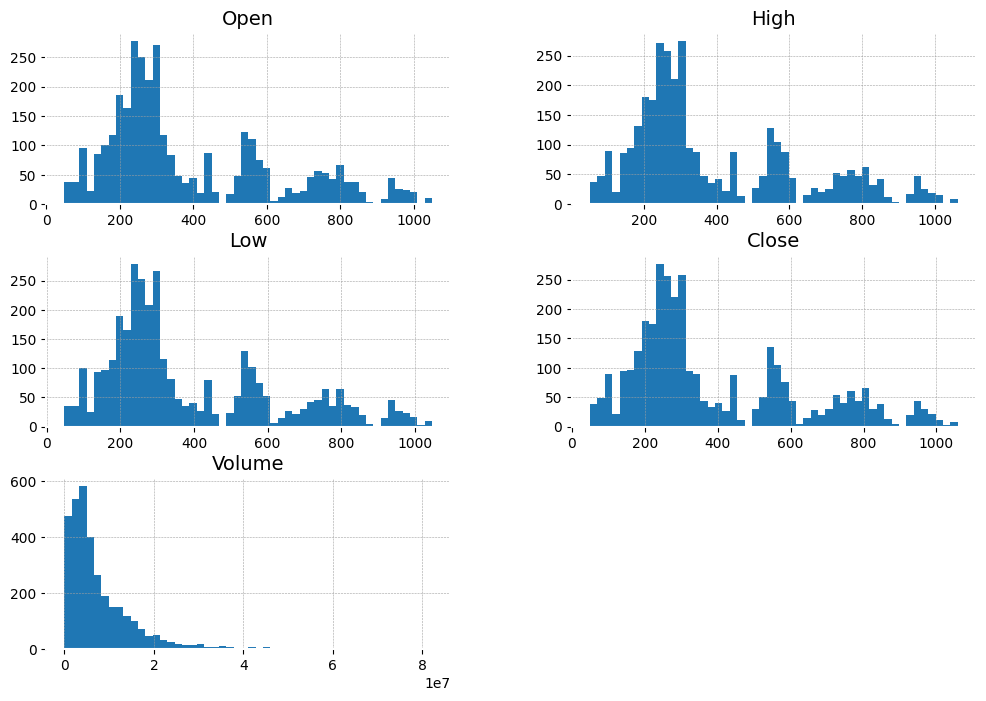

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

data.hist(bins=50, figsize=(12, 8))
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


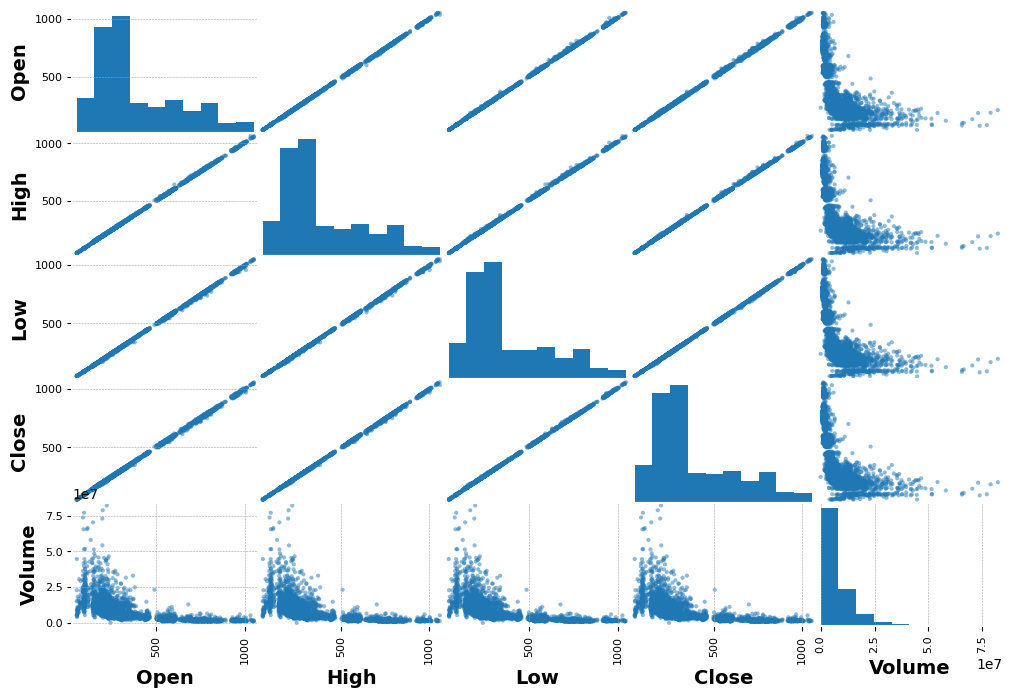

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ['Open',	'High',	'Low',	'Close',	'Volume']
scatter_matrix(data[attributes], figsize=(12, 8))
plt.show()

In [ ]:

# State Class
class State:
    def __init__(self, prices: pd.DataFrame, bars_count: int, commission_perc: float, reset_on_close: bool, reward_on_close: bool = True, volumes: bool = True):
        self.bars_count = bars_count
        self.commission_perc = commission_perc
        self.reset_on_close = reset_on_close
        self.reward_on_close = reward_on_close
        self.volumes = volumes
        self.have_position = False
        self.open_price = 0.0
        self._prices = prices
        self._offset = None

    def reset(self, offset: int):
        self.have_position = False
        self.open_price = 0.0
        self._offset = offset

    @property
    def shape(self):
        # [close, return_1m, return_2m, return_3m, return_1y, macd, rsi, position_flag, volume]
        return (9,) if self.volumes else (8,)

    def encode(self) -> np.ndarray:
        res = np.ndarray(shape=self.shape, dtype=np.float32)
        shift = 0
        res[shift] = self._prices['Close'].iloc[self._offset]  # close price
        shift += 1
        res[shift] = (self._prices['Close'].iloc[self._offset] - self._prices['Close'].iloc[self._offset-30]) / self._prices['Close'].iloc[self._offset-30]  # return 1m
        shift += 1
        res[shift] = (self._prices['Close'].iloc[self._offset] - self._prices['Close'].iloc[self._offset-60]) / self._prices['Close'].iloc[self._offset-60]  # return 2m
        shift += 1
        res[shift] = (self._prices['Close'].iloc[self._offset] - self._prices['Close'].iloc[self._offset-90]) / self._prices['Close'].iloc[self._offset-90]  # return 3m
        shift += 1
        res[shift] = (self._prices['Close'].iloc[self._offset] - self._prices['Close'].iloc[self._offset-252]) / self._prices['Close'].iloc[self._offset-252]  # return 1y
        shift += 1
        res[shift] = self._prices['Close'].iloc[self._offset] - self._prices['Close'].iloc[self._offset-63]  # macd
        shift += 1
        res[shift] = (self._prices['Close'].iloc[self._offset] - self._prices['Close'].min()) / (self._prices['Close'].max() - self._prices['Close'].min()) * 100  # rsi
        if self.volumes:
            shift += 1
            res[shift] = self._prices['Volume'].iloc[self._offset]  # volume
        shift += 1
        res[shift] = float(self.have_position)  # position flag
        return res


# Actions Enum
class Actions(enum.Enum):
    Skip = 0
    Buy = 1
    Close = 2


# Map Continuous or Invalid Actions to the Discrete Action Space
def map_action(action_value):
    if action_value <= 0:  # Treat negative or zero values as Skip
        return Actions.Skip
    elif action_value == 1:  # Treat 1 as Buy
        return Actions.Buy
    else:  # Treat any other value as Close
        return Actions.Close

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Environment Class
class StocksEnv(gym.Env):
    def __init__(self, prices: pd.DataFrame, bars_count: int = 10, commission: float = 0.1, reset_on_close: bool = True, reward_on_close: bool = False, volumes=False):
        self._prices = prices
        self._state = State(prices, bars_count, commission, reset_on_close, reward_on_close, volumes)
        self.action_space = spaces.Discrete(n=len(Actions))
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=self._state.shape, dtype=np.float32)

    def reset(self, seed=None, options=None):
        bars = self._state.bars_count
        offset = np.random.choice(len(self._prices) - bars * 10) + bars
        self._state.reset(offset)
        return self._state.encode(), {}

    def step(self, action_idx: int):
        action = Actions(action_idx)
        reward = 0.0
        done = False
        close = self._prices['Close'].iloc[self._state._offset]
        if action == Actions.Buy and not self._state.have_position:
            self._state.have_position = True
            self._state.open_price = close
            reward -= self._state.commission_perc
        elif action == Actions.Close and self._state.have_position:
            reward -= self._state.commission_perc
            done |= self._state.reset_on_close
            if self._state.reward_on_close:
                reward += 100.0 * (close / self._state.open_price - 1.0)
            self._state.have_position = False
            self._state.open_price = 0.0
        self._state._offset += 1
        prev_close = close
        close = self._prices['Close'].iloc[self._state._offset]
        done |= self._state._offset >= len(self._prices) - 1
        if self._state.have_position and not self._state.reward_on_close:
            reward += 100.0 * (close / prev_close - 1.0)
        return self._state.encode(), reward, done, False, {}

    @classmethod
    def from_data(cls, data: pd.DataFrame, **kwargs):
        return StocksEnv(data, **kwargs)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 5.99     |
|    ep_rew_mean     | 0.191    |
| time/              |          |
|    fps             | 216      |
|    iterations      | 1        |
|    time_elapsed    | 9        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 6.93        |
|    ep_rew_mean          | 0.187       |
| time/                   |             |
|    fps                  | 222         |
|    iterations           | 2           |
|    time_elapsed         | 18          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009726642 |
|    clip_fraction        | 0.0378      |
|    clip_range           | 0.2         |
|    entropy_loss   

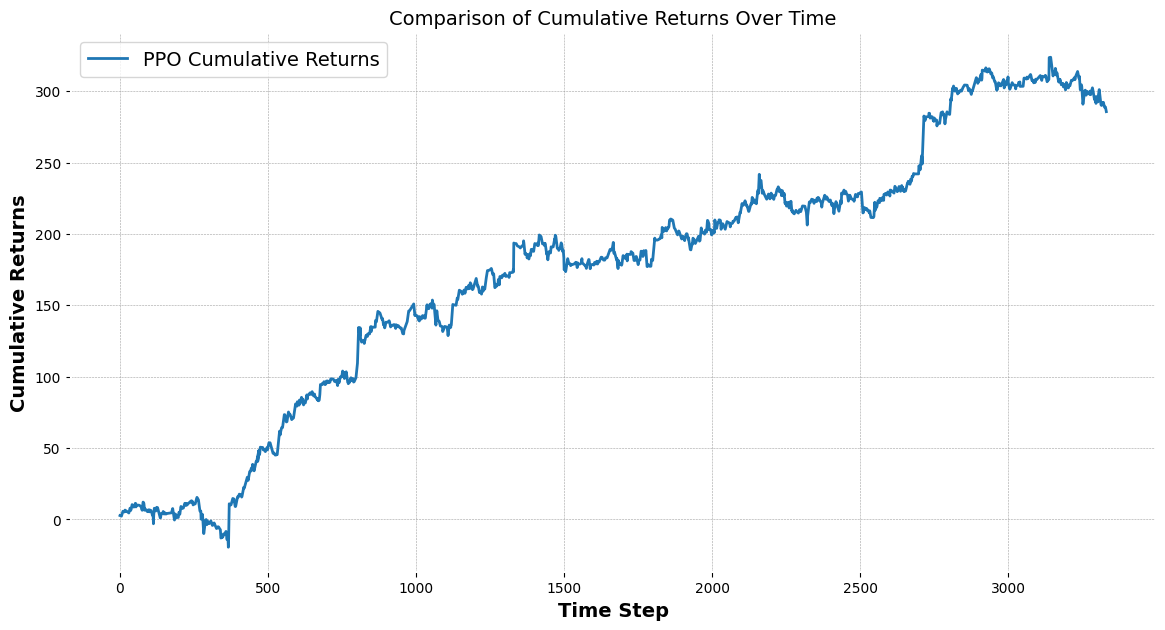

In [ ]:
# Long Only Strategy
def long_only_strategy(prices, t):
    return 1  # Always Buy


# Sign(R) Strategy
def sign_r_strategy(prices, t, window=252):
    if t < window:
        return 0  # Do nothing if not enough data
    past_return = prices['Close'].iloc[t] / prices['Close'].iloc[t - window] - 1
    return np.sign(past_return)


# MACD Strategy
def macd_signal_strategy(prices, t, short_window=12, long_window=26, signal_window=9):
    if t < long_window:
        return 0  # Do nothing if not enough data
    short_ema = prices['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = prices['Close'].ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal_window, adjust=False).mean()
    macd_diff = macd - signal_line
    phi_macd = macd_diff.iloc[t] * np.exp(-macd_diff.iloc[t] ** 2 / 4) / 0.89
    return np.sign(phi_macd)


# Evaluate Strategies
def evaluate_strategy(strategy_fn, env, data):
    obs, _ = env.reset()
    rewards = []
    for t in range(len(data) - 1):
        action_value = strategy_fn(data, t)
        action = map_action(action_value)
        obs, reward, done, _, _ = env.step(action.value)
        rewards.append(reward)
        if done:
            obs, _ = env.reset()
    cumulative_returns = np.cumsum(rewards)
    return cumulative_returns




env = StocksEnv.from_data(data)

ppo_model = PPO('MlpPolicy', env, verbose=1)
ppo_model.learn(total_timesteps=10000)
ppo_model.save("ppo_stocks")

# PPO Evaluation
obs, _ = env.reset()
net_worths_ppo = []
for _ in range(len(data) - 1):
    action_value, _ = ppo_model.predict(obs)
    action = map_action(action_value)
    obs, reward, done, _, _ = env.step(action.value)
    net_worths_ppo.append(reward)
    if done:
        obs, _ = env.reset()

# Plot PPO Results
cumulative_returns_ppo = np.cumsum(net_worths_ppo)
plt.figure(figsize=(14, 7))
plt.plot(cumulative_returns_ppo, label='PPO Cumulative Returns')

# Evaluate Baseline Strategies
long_only_returns = evaluate_strategy(long_only_strategy, env, data)
sign_r_returns = evaluate_strategy(sign_r_strategy, env, data)
macd_returns = evaluate_strategy(macd_signal_strategy, env, data)

# Plot Baseline Results
# plt.plot(long_only_returns, label='Long Only Cumulative Returns')
# plt.plot(sign_r_returns, label='Sign(R) Cumulative Returns')
# plt.plot(macd_returns, label='MACD Cumulative Returns')
plt.title('Comparison of Cumulative Returns Over Time')
plt.xlabel('Time Step')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.5      |
|    ep_rew_mean      | -1.21    |
|    exploration_rate | 0.975    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 352      |
|    time_elapsed     | 0        |
|    total_timesteps  | 26       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.88     |
|    ep_rew_mean      | 0.123    |
|    exploration_rate | 0.948    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 361      |
|    time_elapsed     | 0        |
|    total_timesteps  | 55       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.5      |
|    ep_rew_mean      | -0.0726

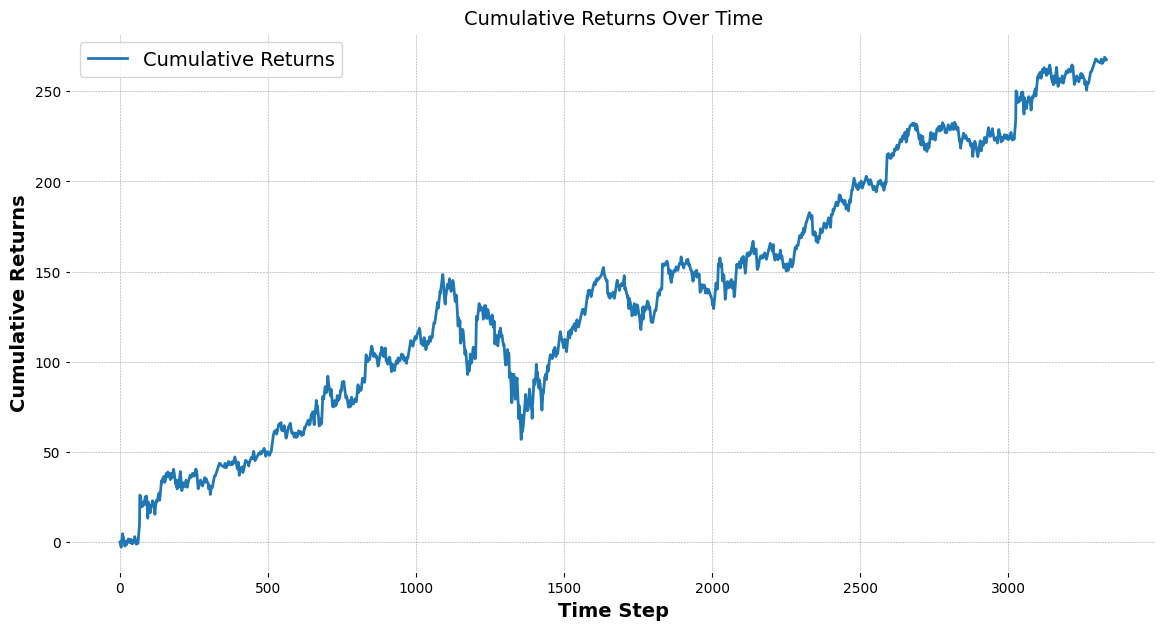

In [ ]:
from stable_baselines3 import DQN, A2C

# Define the environment
env = StocksEnv.from_data(data)

# Create and train the DQN model
dqn_model = DQN('MlpPolicy', env, verbose=1)
dqn_model.learn(total_timesteps=10000)

# Save the model
dqn_model.save("dqn_stocks")

# Load the model
dqn_model = DQN.load("dqn_stocks")

# Evaluation
obs, _ = env.reset()
net_worths_dqn = []
for _ in range(len(data) - 1):
    action, _ = dqn_model.predict(obs)
    # Ensure the action is within the valid range
    action = np.clip(action, -1, 1)
    obs, reward, done, _, _ = env.step(action)
    net_worths_dqn.append(reward)
    if done:
        obs, _ = env.reset()

# Plot the cumulative returns
cumulative_returns_dqn = np.cumsum(net_worths_dqn)
plt.figure(figsize=(14, 7))
plt.plot(cumulative_returns_dqn, label='Cumulative Returns')
plt.title('Cumulative Returns Over Time')
plt.xlabel('Time Step')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 20.5     |
|    ep_rew_mean        | 1.41     |
| time/                 |          |
|    fps                | 456      |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.41    |
|    explained_variance | -5.66    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -1.64    |
|    value_loss         | 1.14     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 34.5     |
|    ep_rew_mean        | 2.04     |
| time/                 |          |
|    fps                | 441      |
|    iterations         | 200      |
|    time_elapsed 

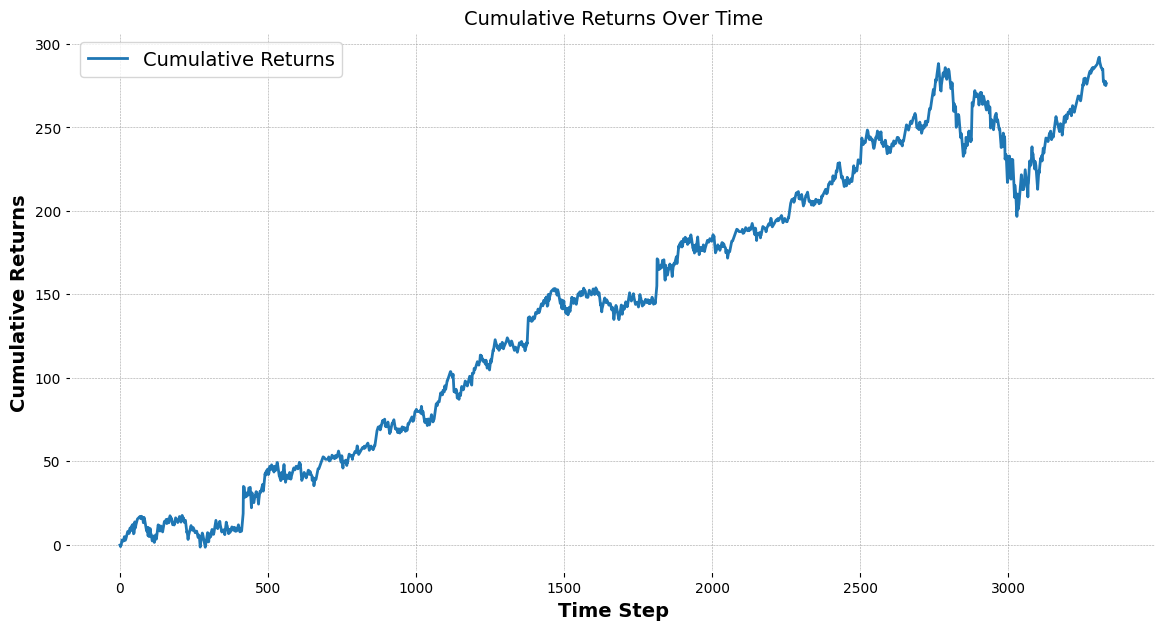

In [ ]:
# Define the environment
env = StocksEnv.from_data(data)

# Create and train the A2C model
a2c_model = A2C('MlpPolicy', env, verbose=1)
a2c_model.learn(total_timesteps=10000)

# Save the model
a2c_model.save("a2c_stocks")

# Load the model
a2c_model = A2C.load("a2c_stocks")

# Evaluation
obs, _ = env.reset()
net_worths_a2c = []
for _ in range(len(data) - 1):
    action, _ = a2c_model.predict(obs)
    action = np.clip(action, -1, 1)
    obs, reward, done, _, _ = env.step(action)
    net_worths_a2c.append(reward)
    if done:
        obs, _ = env.reset()

# Plot the cumulative returns
cumulative_returns_a2c = np.cumsum(net_worths_a2c)
plt.figure(figsize=(14, 7))
plt.plot(cumulative_returns_a2c, label='Cumulative Returns')
plt.title('Cumulative Returns Over Time')
plt.xlabel('Time Step')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

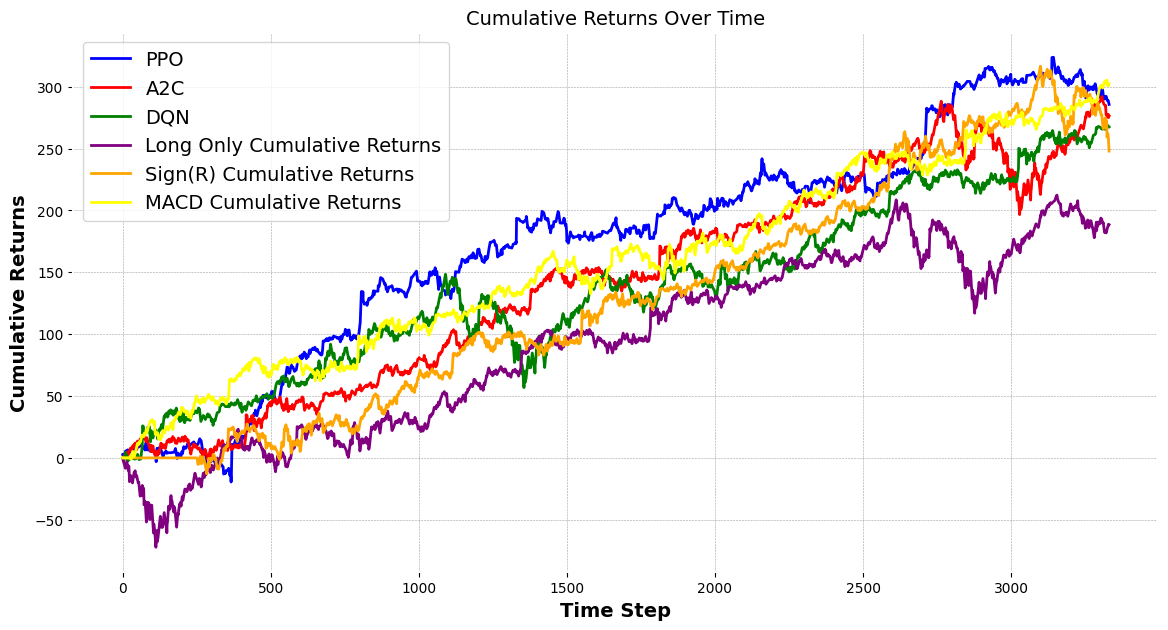

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(cumulative_returns_ppo, label='PPO', color='blue')
plt.plot(cumulative_returns_a2c, label='A2C', color='red')
plt.plot(cumulative_returns_dqn, label='DQN', color='green')
plt.plot(long_only_returns, label='Long Only Cumulative Returns',color='purple')
plt.plot(sign_r_returns, label='Sign(R) Cumulative Returns',color='orange')
plt.plot(macd_returns, label='MACD Cumulative Returns',color='yellow')
plt.title('Cumulative Returns Over Time')
plt.xlabel('Time Step')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()